# SHOE BRANDS CAPSTONE PROJECT

 By Subashree Rajkumar

# PHASE 3 

# EXPLORATORY DATA ANALYSIS

In [1]:
#Importing the required library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Makeing only 1 dataframe of 3 csv file using concat/merge /join operation of pandas 

In [4]:
merged_df = pd.DataFrame()
final_merged_df = pd.DataFrame()
merged_df = pd.merge(pd.read_csv(f"table_1.csv", index_col=None), pd.read_csv(f"table_2.csv", index_col=None), on='link', how="outer" )
final_merged_df = pd.merge(merged_df, pd.read_csv(f"table_3.csv", index_col=None), on='link', how="outer")
final_merged_df.to_csv('table_all.csv',index=None)

# The final merged file information

In [5]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   link                   320 non-null    object 
 1   shoe_name              320 non-null    object 
 2   category               320 non-null    object 
 3   number_of_colors       320 non-null    int64  
 4   price                  320 non-null    int64  
 5   number_of_sizes        320 non-null    int64  
 6   color_1                254 non-null    object 
 7   color_2                176 non-null    object 
 8   color_3                133 non-null    object 
 9   color_4                118 non-null    object 
 10  color_5                104 non-null    object 
 11  style_or_product_code  320 non-null    object 
 12  reviews                320 non-null    int64  
 13  size                   211 non-null    object 
 14  comfort                254 non-null    float64
 15  quanti

# Shape of the dataframe

In [6]:
final_merged_df.shape

(320, 17)

# Statistical Analysis about the dataframe

In [7]:
final_merged_df.describe()

,number_of_colors,price,number_of_sizes,reviews,comfort,quantification,stars
count,320.000000,320.00000,320.000000,320.000000,254.000000,254.000000,320.000000
mean,4.484375,7854.26250,6.128125,184.593750,1.008467,0.964826,2.817986
std,5.561264,3955.61403,7.029215,720.129306,1.724572,1.773229,2.209330
min,0.000000,70.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5495.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,7999.00000,2.000000,6.500000,0.000000,0.000000,4.253100
75%,7.000000,10999.00000,12.000000,57.000000,1.747500,0.972500,4.675025
max,28.000000,17000.00000,25.000000,7027.000000,5.000000,5.000000,5.000000


# Check for null values in the dataframe

In [8]:
final_merged_df.isnull().sum()

link                       0
shoe_name                  0
category                   0
number_of_colors           0
price                      0
number_of_sizes            0
color_1                   66
color_2                  144
color_3                  187
color_4                  202
color_5                  216
style_or_product_code      0
reviews                    0
size                     109
comfort                   66
quantification            66
stars                      0
dtype: int64

As we can clearly see there are missing values in Color 1,2,3,4,5,sizes,comfort and quantification columns.

So we have to treat these missing values  by either dropping certain columns/rows, imputing the values, or a mix of both.

Here we use SimpleImputer to treat the null values.


# Treating and checking for null values.

In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')  
final_merged_df[['color_1', 'color_2', 'color_3', 'color_4', 'color_5', 'size']] = imputer.fit_transform(final_merged_df[['color_1', 'color_2', 'color_3', 'color_4', 'color_5', 'size']])

imputer = SimpleImputer(strategy='median')
final_merged_df[['comfort', 'quantification']] = imputer.fit_transform(final_merged_df[['comfort', 'quantification']])


In [10]:
final_merged_df.isnull().sum()

link                     0
shoe_name                0
category                 0
number_of_colors         0
price                    0
number_of_sizes          0
color_1                  0
color_2                  0
color_3                  0
color_4                  0
color_5                  0
style_or_product_code    0
reviews                  0
size                     0
comfort                  0
quantification           0
stars                    0
dtype: int64

In [ ]:
Now we can see there are no null values.

# first 5 rows in dataframe

In [11]:
final_merged_df.head()

,link,shoe_name,category,number_of_colors,price,number_of_sizes,color_1,color_2,color_3,color_4,color_5,style_or_product_code,reviews,size,comfort,quantification,stars
0,https://www.adidas.co.in/gazelle-shoes/IG1062....,Gazelle Shoes,U,1,10999,0,Glory Red / Off White / Cream White,35,40,40,40,MDW13,6,"10.5,7.5,12,5.5,6.5,9.5,7,11.5,6,10,5,8.5,9,11,8",4.833333,5.000000,4.8
1,https://www.adidas.co.in/gazelle-bold-shoes/ID...,Gazelle Bold Shoes,W,1,11999,0,Red / Cloud White / Gold Metallic,35,40,40,40,MBU94,530,"10.5,7.5,12,5.5,6.5,9.5,7,11.5,6,10,5,8.5,9,11,8",4.445283,4.698113,4.7
2,https://www.adidas.co.in/samba-og-shoes/B75807...,Samba OG Shoes,U,1,10999,0,Core Black / Cloud White / Gum,35,40,40,40,BSZ08,7027,"10.5,7.5,12,5.5,6.5,9.5,7,11.5,6,10,5,8.5,9,11,8",4.227176,4.586025,4.8
3,https://www.adidas.co.in/samba-og-shoes/B75806...,Samba OG Shoes,U,1,11999,0,Cloud White / Core Black / Clear Granite,35,40,40,40,BSZ08,7027,"10.5,7.5,12,5.5,6.5,9.5,7,11.5,6,10,5,8.5,9,11,8",4.227176,4.586025,4.8
4,https://www.adidas.co.in/superstar-shoes/EG495...,Superstar Shoes,U,1,8999,0,Core Black / Cloud White / Core Black,35,40,40,40,GVS47,4848,"10.5,7.5,12,5.5,6.5,9.5,7,11.5,6,10,5,8.5,9,11,8",4.304384,4.572814,4.8


# Categorize the columns to numeric and categorical for univariate and bivariate analysis

In [12]:
numeric_columns = final_merged_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = final_merged_df.select_dtypes(include=['object']).columns


# Univariate Analysis for Numerical Columns

In [4]:
#Histplot for Univariate Analysis for Numerical coloumns.

Summary Statistics for number_of_colors:
count    320.000000
mean       4.484375
std        5.561264
min        0.000000
25%        1.000000
50%        2.000000
75%        7.000000
max       28.000000
Name: number_of_colors, dtype: float64
Skewness for number_of_colors: 1.505870864798093


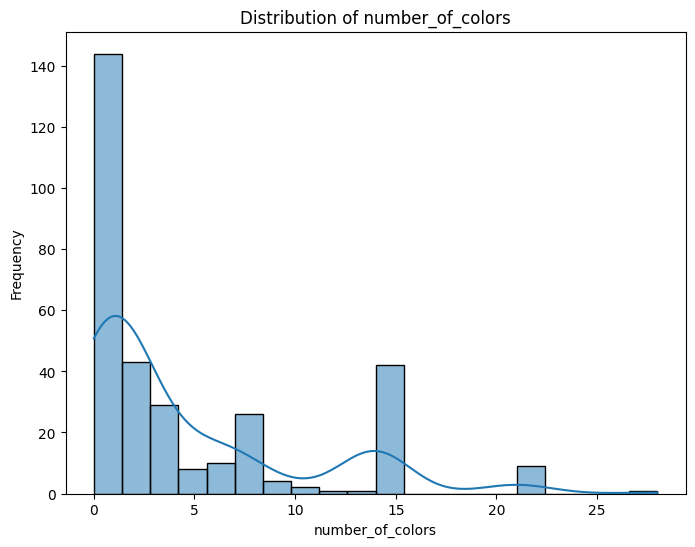

Summary Statistics for price:
count      320.00000
mean      7854.26250
std       3955.61403
min         70.00000
25%       5495.00000
50%       7999.00000
75%      10999.00000
max      17000.00000
Name: price, dtype: float64
Skewness for price: -0.4144424746350801


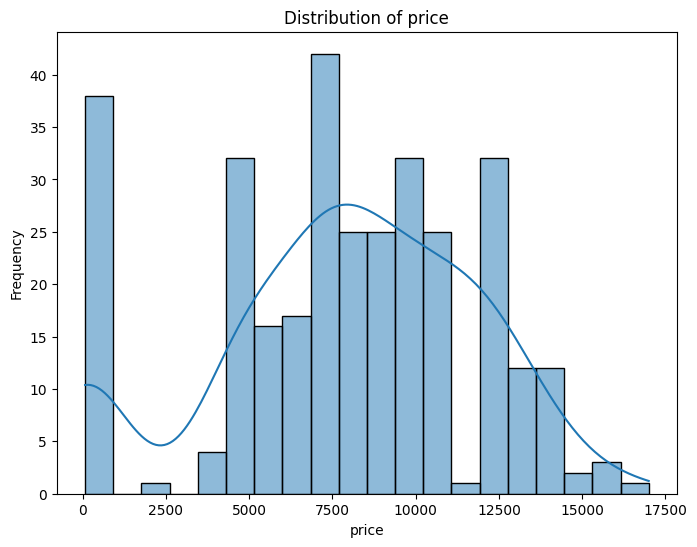

Summary Statistics for number_of_sizes:
count    320.000000
mean       6.128125
std        7.029215
min        0.000000
25%        0.000000
50%        2.000000
75%       12.000000
max       25.000000
Name: number_of_sizes, dtype: float64
Skewness for number_of_sizes: 0.779997338015872


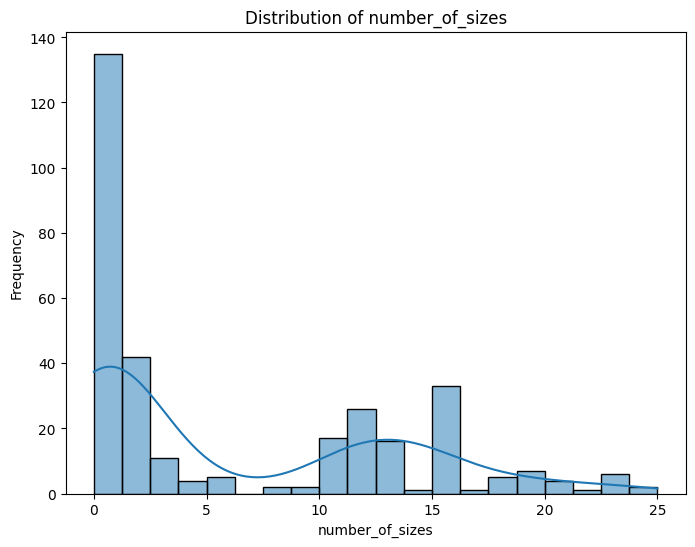

Summary Statistics for reviews:
count     320.000000
mean      184.593750
std       720.129306
min         0.000000
25%         0.000000
50%         6.500000
75%        57.000000
max      7027.000000
Name: reviews, dtype: float64
Skewness for reviews: 7.108550821580423


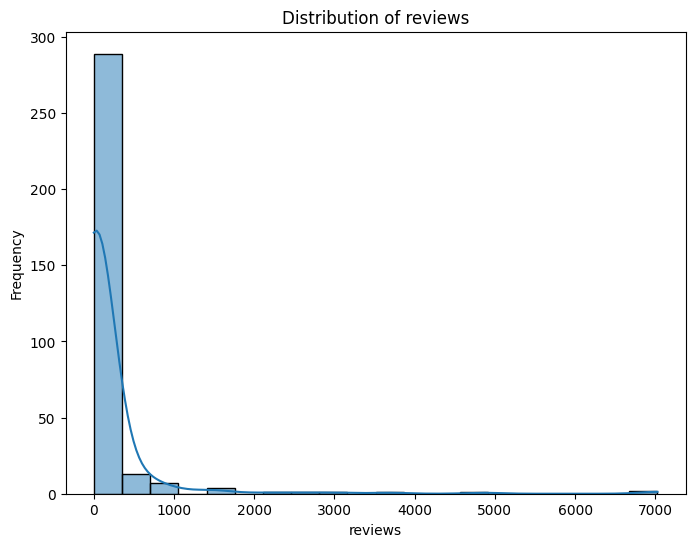

Summary Statistics for comfort:
count    320.000000
mean       0.800470
std        1.589284
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: comfort, dtype: float64
Skewness for comfort: 1.7246330209937766


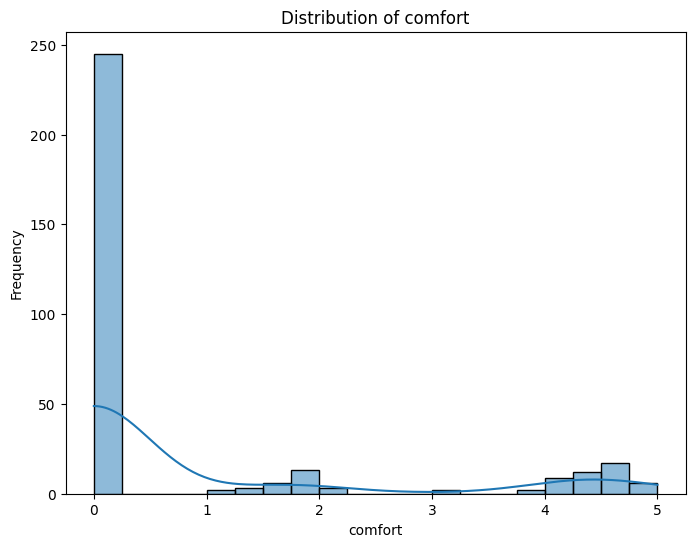

Summary Statistics for quantification:
count    320.000000
mean       0.765830
std        1.626857
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: quantification, dtype: float64
Skewness for quantification: 1.9069467936275117


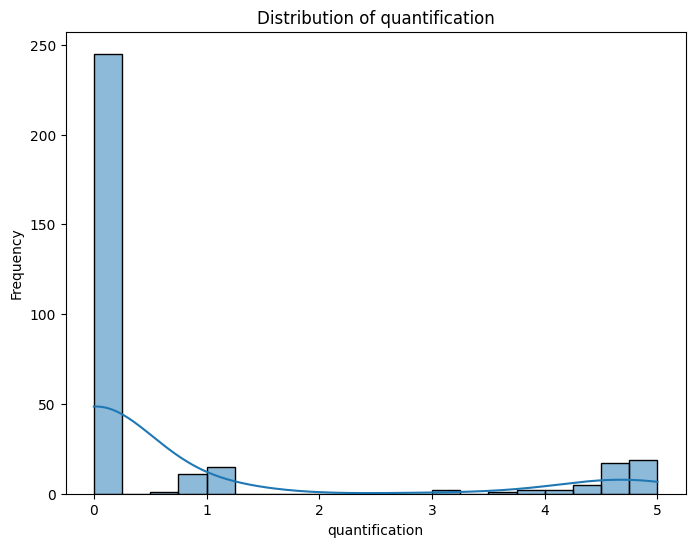

Summary Statistics for stars:
count    320.000000
mean       2.817986
std        2.209330
min        0.000000
25%        0.000000
50%        4.253100
75%        4.675025
max        5.000000
Name: stars, dtype: float64
Skewness for stars: -0.4599537728583149


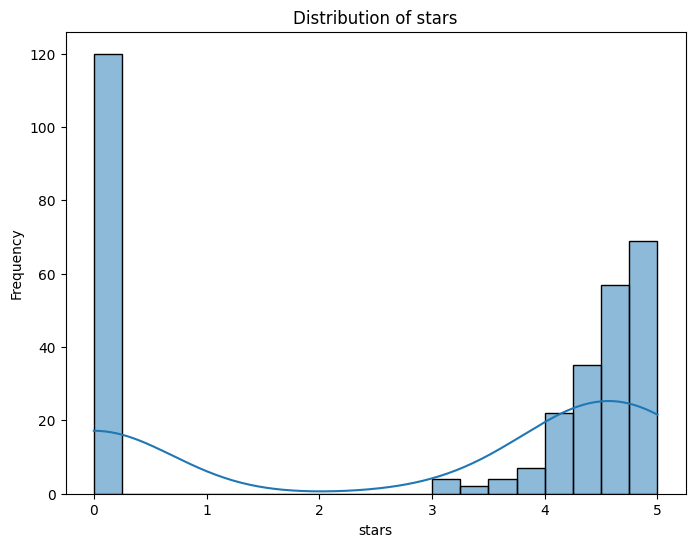

In [14]:
for col in numeric_columns:
    print(f"Summary Statistics for {col}:")
    print(final_merged_df[col].describe())
    plt.figure(figsize=(8, 6))
    print(f"Skewness for {col}: {final_merged_df[col].skew()}")
    sns.histplot(final_merged_df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
# Box plot for Univariate Analysis on Numerical coloums

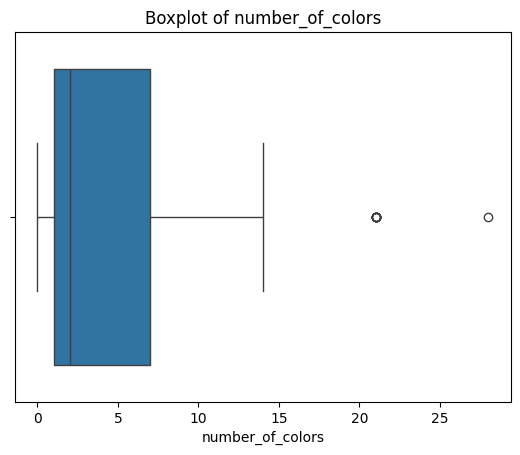

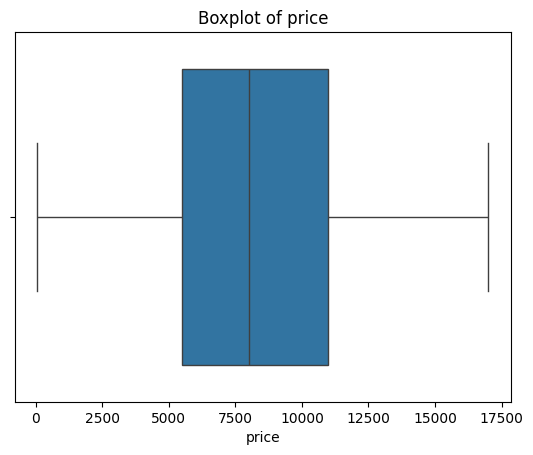

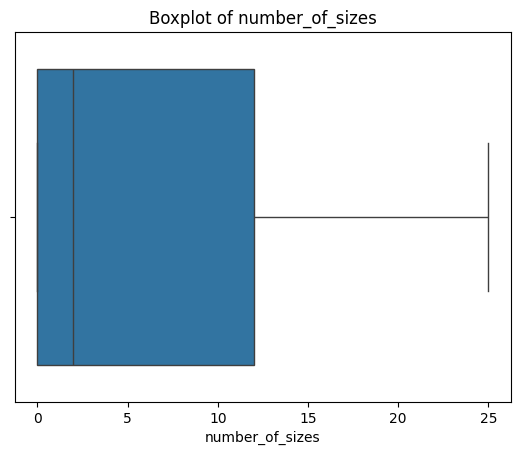

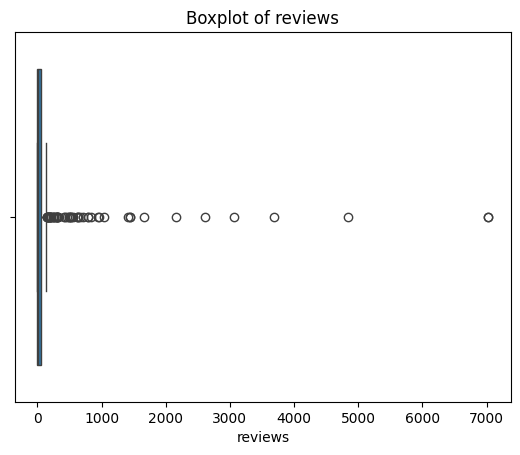

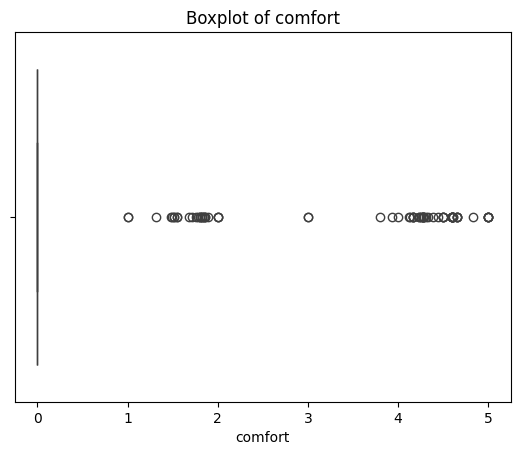

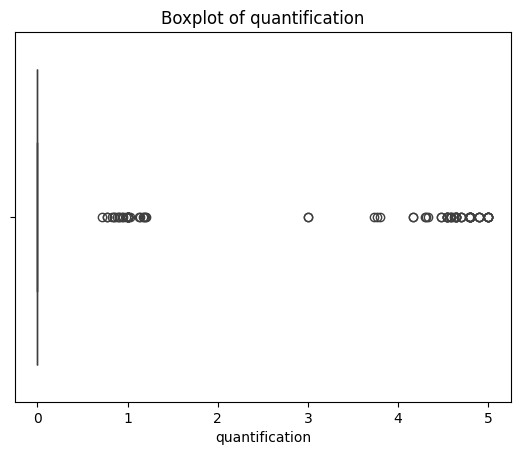

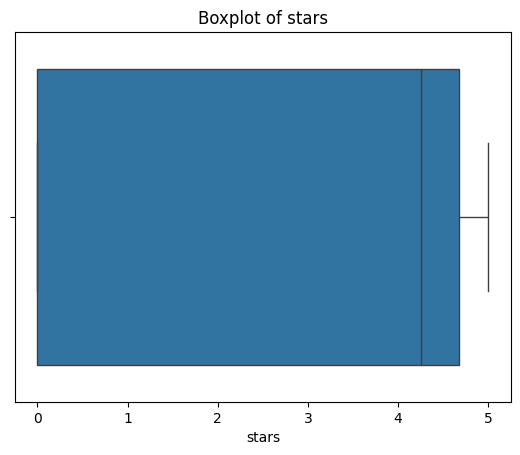

In [15]:

for column in numeric_columns:
    sns.boxplot(x=final_merged_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


# Inference on Univariate Analysis on numerical columns
- The average priced shoes are being sold more than the high priced or low priced ones
- There is a negative skewness observed for price and stars
- There are outliers in quantification, comfort, reviews

# Bivariate Analysis (Numerical vs Numerical Columns)

In [7]:
#Pairplot for Bivariate Anaysis for Numerical columns

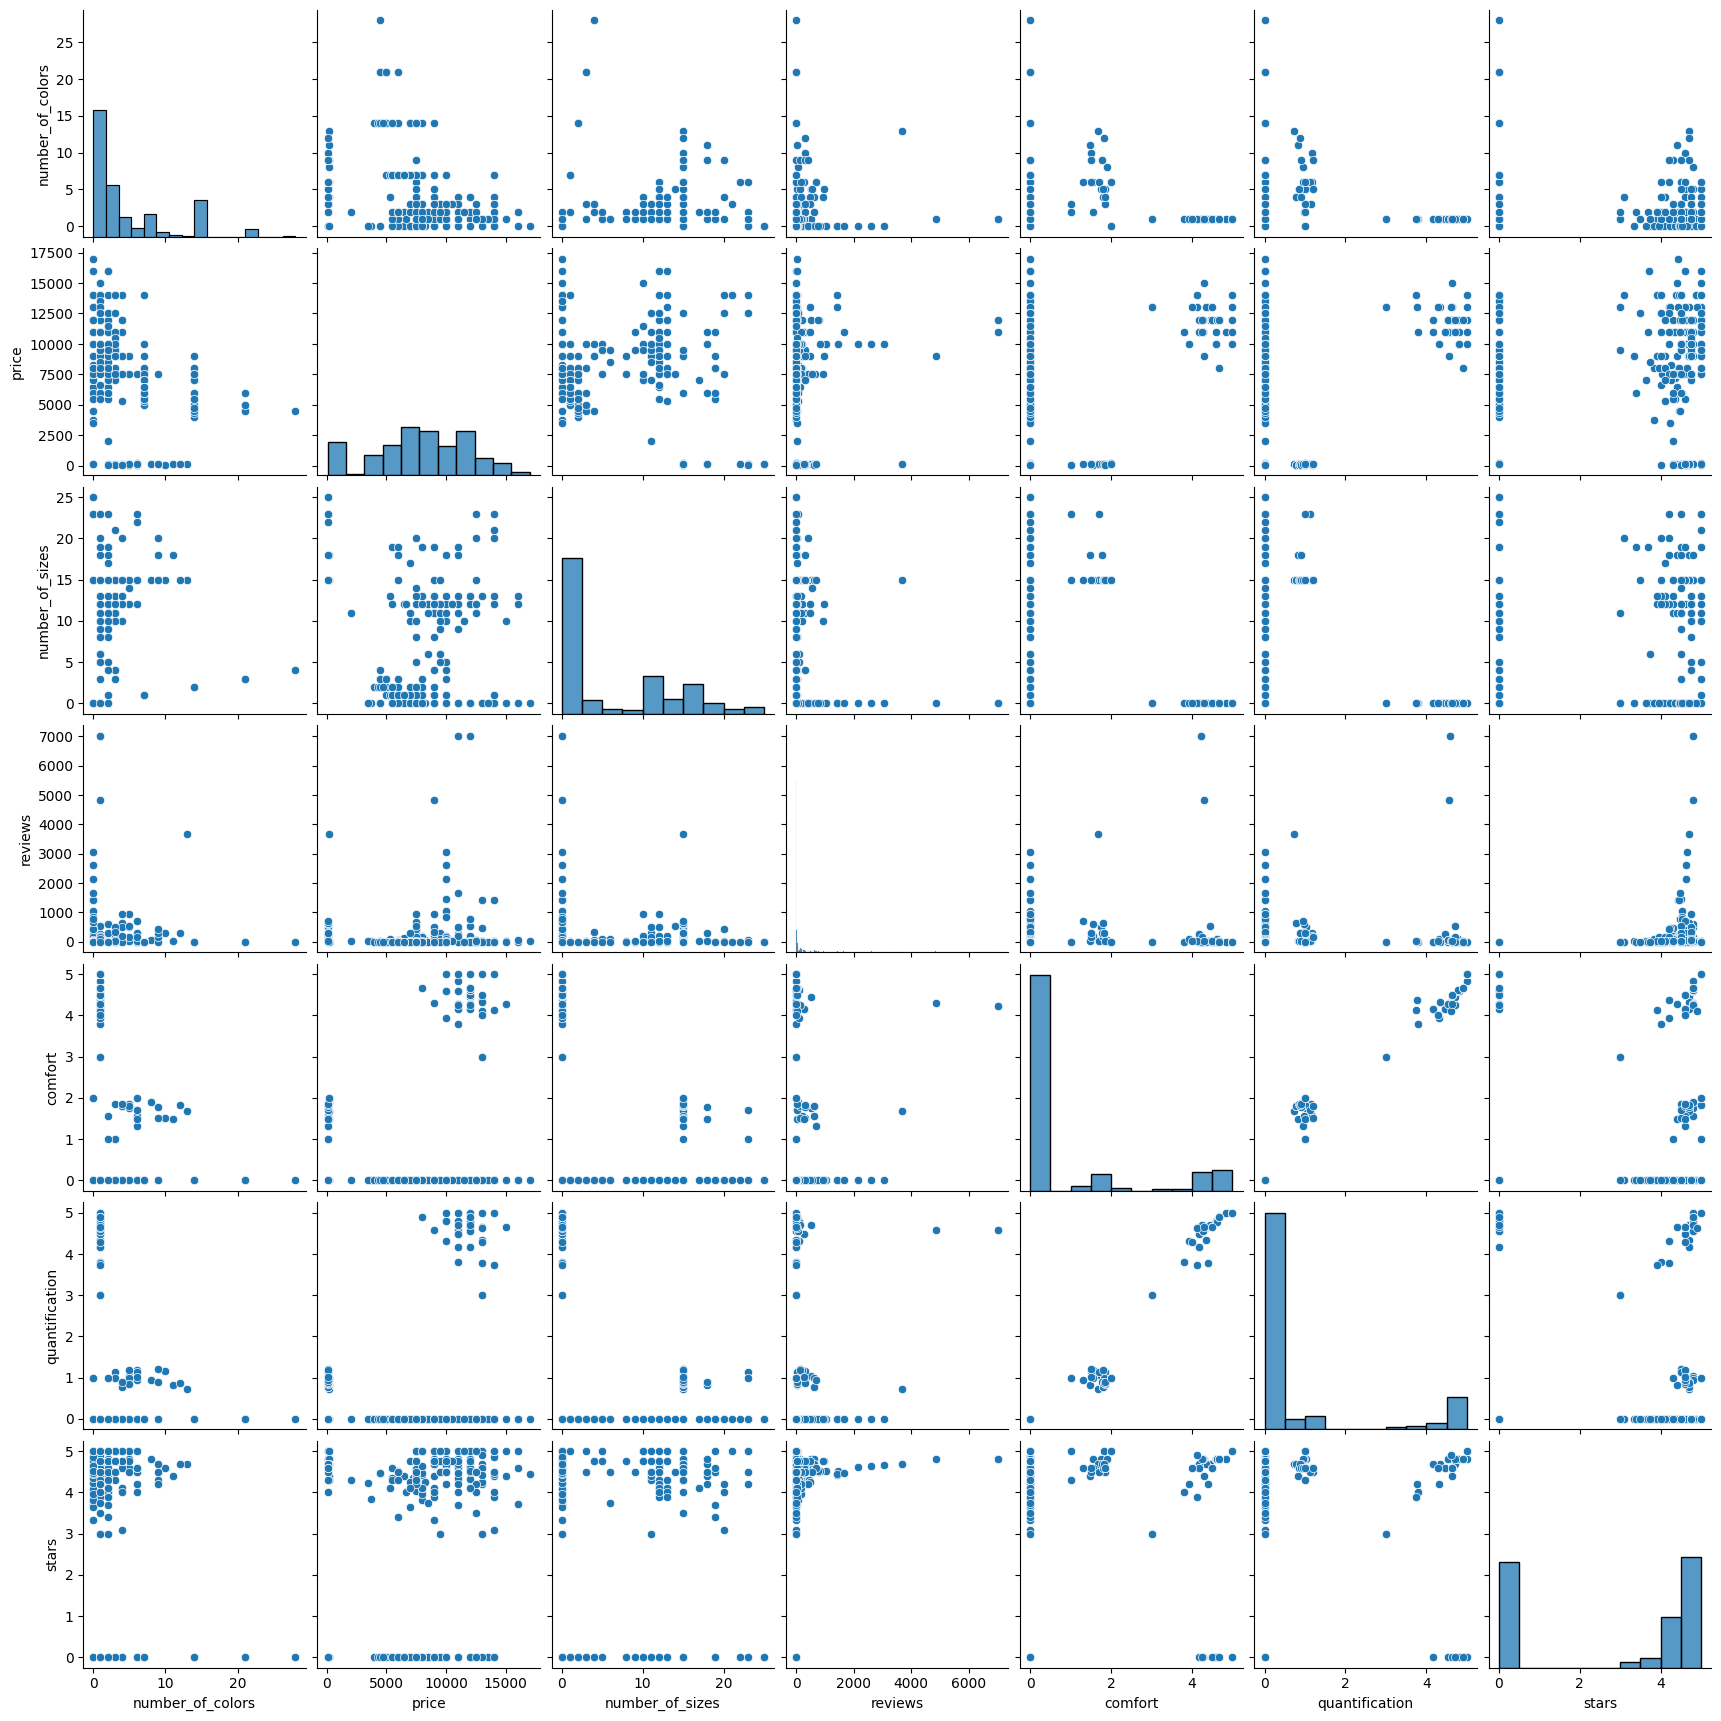

In [16]:
sns.pairplot(final_merged_df[numeric_columns])
plt.show()


# Bivariate Analysis Numerical vs Category

In [9]:
bivariate_columns = ['number_of_colors', 'price', 'number_of_sizes', 'reviews', 'comfort', 'quantification', 'stars']

for col in bivariate_columns:
    if col in final_merged_df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='category', y=col, data=final_merged_df)
        plt.title(f'{col} by Category')
        plt.xlabel('Category')
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.show()

## Inference
- Women shoe are cheaper than Men shoe
- The number of colors for women's shoe is higher than men's shoe

# Correlation matrix for numerical columns

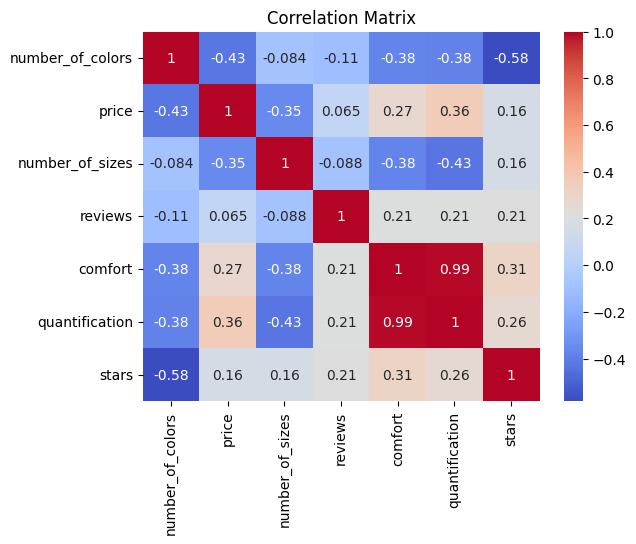

In [94]:

correlation_matrix = final_merged_df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Inference
- Comfort and quantification are closely correlated